In [38]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Análise exploratória.

In [39]:
df = pd.read_csv("olist_order_reviews_dataset.csv.zip")
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [40]:
# Devemos verificar se existem valores nulos no dataset
df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [41]:
# Temos que remover as linhas onde review_comment_message é nulo, pois é a coluna principal para a análise
df = df.dropna(subset=['review_comment_message'])

print(df.shape)
# A coluna review_comment não deve mais ter valores nulos.
df.isnull().sum()

(40977, 7)


review_id                      0
order_id                       0
review_score                   0
review_comment_title       31138
review_comment_message         0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [42]:
def satisfaction(x):
    if x > 3:
        return "satisfied"
    elif x == 3:
        return "neutral"
    else:
        return "not satisfied"


# A coluna review_score é a coluna alvo, e vamos transformar em uma coluna categórica -> "satisfied", "neutral", "not satisfied"
# Fazemos isso para que fique mais fácil de visualizar os resultados e faz sentido nesse caso agrupar ...
# ... as notas 4 e 5 como satisfeitos, 3 como neutro e 1 e 2 como insatisfeitos.
df["review_satisfaction"] = df["review_score"].apply(satisfaction)
df

/tmp/ipykernel_4388/2802234175.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review_satisfaction"] = df["review_score"].apply(satisfaction)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_satisfaction
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,satisfied
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,satisfied
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,satisfied
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,satisfied
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,satisfied
...,...,...,...,...,...,...,...,...
99205,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,NaN,para este produto recebi de acordo com a compr...,2017-11-29 00:00:00,2017-11-30 15:52:51,satisfied
99208,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23,satisfied
99215,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06,neutral
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,satisfied


In [43]:
df["review_satisfaction"].value_counts()

satisfied        26530
not satisfied    10890
neutral           3557
Name: review_satisfaction, dtype: int64

In [44]:
# downloaded from https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt
with open("stopwords_ptbr.txt", "r") as f:
    stopwords = f.readlines()
stopwords = list(map(lambda x: x.strip().replace("\n", ""), stopwords))
stopwords[1:10]

['a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para']

In [45]:
from sklearn.utils import resample

# Existem muito mais reviews satisfeitos do que insatisfeitos, então vamos balancear o dataset
satisfied = df[df["review_satisfaction"] == 'satisfied']
other = df[df['review_satisfaction'] != 'satisfied']

# Vamos fazer um undersampling, ou seja, vamos pegar uma amostra aleatória do dataset de reviews satisfeitos
n_samples = len(other)
satisfied_undersampled = resample(satisfied, replace=False, n_samples=n_samples, random_state=42)

# Agora vamos concatenar os dois datasets
df_balanced = pd.concat([satisfied_undersampled, other])
df_balanced["review_satisfaction"].value_counts()

satisfied        14447
not satisfied    10890
neutral           3557
Name: review_satisfaction, dtype: int64

In [46]:
X = df_balanced["review_comment_message"].to_numpy()
Y = df_balanced["review_satisfaction"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

classificador = Pipeline(
    [
        ('meu_vetorizador', CountVectorizer(stop_words=stopwords)),
        ('meu_classificador', LogisticRegression(penalty='l1', solver='saga', max_iter=10_000))
    ]
)

classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print(acc)

0.8029988465974626


In [53]:
import joblib
CLASS_PATH = 'classificador.joblib'
# joblib.dump(classificador, CLASS_PATH)
# classificador = joblib.load(CLASS_PATH)

['classificador_un.joblib']

In [51]:
classificador.classes_
# neutros -> 0; Nao satisfeitos -> 1; Satisfeitos -> 2

array(['neutral', 'not satisfied', 'satisfied'], dtype=object)

(3, 12813)


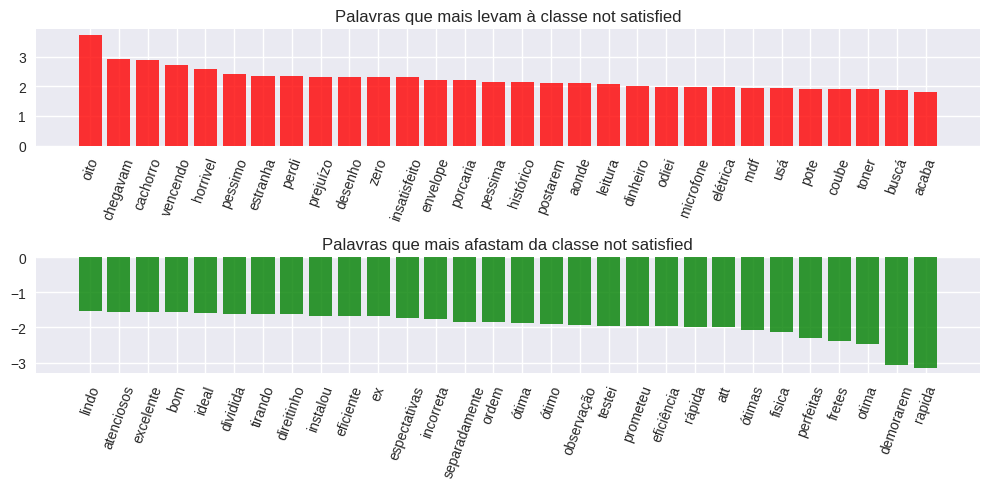

In [52]:
vocabulario = classificador['meu_vetorizador'].vocabulary_
pesos = classificador['meu_classificador'].coef_
print(pesos.shape)

# Para a classe Não satisfeitos.
classe_alvo = 1
classe_alvo_str = classificador.classes_[classe_alvo]

palavras_e_pesos = []
for palavra in vocabulario.keys():
    # Se a palavra é um numero, não a consideramos
    if palavra.isnumeric():
        continue
    j = vocabulario[palavra]
    coeficiente = pesos[classe_alvo, j]
    palavras_e_pesos.append( (coeficiente, palavra) )

# reverse=True pede uma ordenação em ordem decrescente
tuplas_ordenadas = sorted(palavras_e_pesos, reverse=True) 
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 30
eixo_x = np.arange(n_palavras)
fig = plt.figure(figsize=(10, 5))

# Use the seaborn style on matplotlib
plt.style.use('seaborn-v0_8')
plt.subplot(2, 1, 1)
plt.title(f'Palavras que mais levam à classe {classe_alvo_str}')
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras], color='red', alpha=0.8)
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=70)

plt.subplot(2, 1, 2)
plt.title(f'Palavras que mais afastam da classe {classe_alvo_str}')
plt.bar(eixo_x[-n_palavras:], contagens[-n_palavras:], color='green', alpha=0.8)
plt.xticks(eixo_x[-n_palavras:], palavras[-n_palavras:], rotation=70)

fig.subplots_adjust(hspace=0.6)
plt.tight_layout()
plt.savefig('graf_resultados.png', dpi=300)
plt.show()